In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 1. Các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [4]:
# 2. Đọc file csv
company_csv = '/content/drive/MyDrive/Colab Notebooks/OPC.csv'
data = pd.read_csv(company_csv)
data

,Unnamed: 0,time,open,high,low,close,volume,ticker
0,0,2014-01-02,9910,9910,9850,9850,12650,OPC
1,1,2014-01-03,9150,9910,9150,9910,2160,OPC
2,2,2014-01-06,9450,9850,9450,9850,1090,OPC
3,3,2014-01-07,9850,9850,9850,9850,200,OPC
4,4,2014-01-08,9450,9910,9450,9850,1290,OPC
...,...,...,...,...,...,...,...,...
2463,2463,2023-12-04,22500,22900,22500,22900,15300,OPC
2464,2464,2023-12-05,22900,22900,22900,22900,18500,OPC
2465,2465,2023-12-06,22900,22950,22900,22900,26000,OPC
2466,2466,2023-12-07,22900,22900,22600,22900,19100,OPC


In [5]:
#3. Chọn các cột cần thiết
df = pd.read_csv(company_csv)
df = df[['time','close']]
df['time'] = pd.to_datetime(df['time'])
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


In [6]:
#4. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [7]:
#Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Tìm số k phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    #5. Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số k và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số k và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

#6. Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(x_train, y_train)

# Dự đoán giá trị cho tập kiểm tra
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

# In số k và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 7269.081535583965
Number of neighbors: 2, RMSE: 7458.105490002136
Number of neighbors: 3, RMSE: 7630.590685032776
Number of neighbors: 4, RMSE: 7505.369180277414
Number of neighbors: 5, RMSE: 7422.28659772106
Number of neighbors: 6, RMSE: 7366.903453110758
Number of neighbors: 7, RMSE: 7472.319818572648
Number of neighbors: 8, RMSE: 7450.643076813203
Number of neighbors: 9, RMSE: 7433.783829256236
Number of neighbors: 10, RMSE: 7349.659276719633
Number of neighbors: 11, RMSE: 7312.489260405861
Number of neighbors: 12, RMSE: 7281.515760759812
Number of neighbors: 13, RMSE: 7255.308503878232
Number of neighbors: 14, RMSE: 7213.663182635312
Number of neighbors: 15, RMSE: 7208.074234513049
Number of neighbors: 16, RMSE: 7191.372795157504
Number of neighbors: 17, RMSE: 7176.636580712417
Number of neighbors: 18, RMSE: 7163.538000359639
Number of neighbors: 19, RMSE: 7153.964586999047
Number of neighbors: 20, RMSE: 7152.758032807142
Best k: 20
Best RMSE: 7152.758

In [8]:
#7. Tính MAE, RMSE, MAPE, R-square cho testing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE, RMSE, R-square cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mape_test = calculate_mape(y_test, y_pred)
r_squared_test = r2_score(y_test, y_pred)

# Tính MAE, RMSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mape_val = calculate_mape(y_val, y_pred_val)
r_squared_val = r2_score(y_val, y_pred_val)

# In kết quả
print('---------VALIDATE----------')
print("MAE:", round(mae_val, 3))
print("RMSE:", round(rmse_val, 3))
print("MAPE:", round(mape_val, 3))
print("R-squared:", round(r_squared_val, 3))
print('--------------------------')
print('---------TEST----------')
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MAPE:", round(mape_test, 3))
print("R-squared:", round(r_squared_test, 3))
print('-------------------')

---------VALIDATE----------
MAE: 7113.816
RMSE: 7152.758
MAPE: 30.765
R-squared: -91.09
--------------------------
---------TEST----------
MAE: 5281.468
RMSE: 5691.622
MAPE: 24.026
R-squared: -5.702
-------------------


In [9]:
#8. Dự đoán giá trị cho 30 ngày tiếp theo
last_index = df.index[-1]
last_data = pd.date_range(start=df['time'].iloc[-1], periods=30, freq='D')
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
print(y_next_30_days)

[15956.95 15956.95 15956.95 15956.95 15956.95 15956.95 15956.95 15956.95
 15956.95 15956.95 15956.95 15956.95 15956.95 15956.95 15956.95 15956.95
 15956.95 15956.95 15956.95 15956.95 15956.95 15956.95 15956.95 15956.95
 15956.95 15956.95 15956.95 15956.95 15956.95 15956.95]


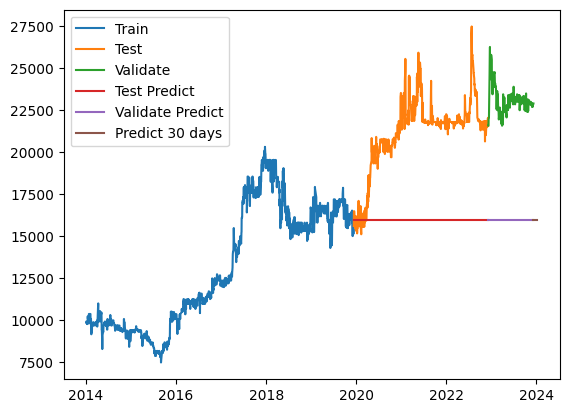

In [10]:
#9. Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['time'], train_data['close'])
ax.plot(test_data['time'], test_data['close'])
ax.plot(val_data['time'], val_data['close'])
ax.plot(test_data['time'], y_pred)
ax.plot(val_data['time'], y_pred_val)
ax.plot(last_data,y_next_30_days)
ax.legend(['Train', 'Test', 'Validate', 'Test Predict', 'Validate Predict','Predict 30 days'])
